# Universal Approximation Theorem

This theorem states that a neural network with two layers (i.e., one hidden layer and one output layer), given enough neurons in the hidden layer and appropriate activation functions, can approximate any continuous function on a compact domain to an arbitrary level of precision.
This means that, in theory, a two-layer neural network can represent any continuous function, which is a fundamental result in the field of neural networks and machine learning.

In this project, we will attempt to test this theory and see if the model we create will be able to approximate any fourth-degree function 

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. Setting Up data for the non-linear function :

### 1.1 Function:


Here we define variables, but feel free to modifie it :

$$f(x) = x_3 X^3 + x_2 X^2 + x_1 X + x_0$$

In [16]:
x0=-1
x1=-1
x2=2
x3=2

### 1.2 The Data :

Let's split data into training set and testing set and into X and Y

##### 1.2.1 X data :

In [17]:
#Create the X and the Y data
X = torch.arange(-2,2,0.04).view(-1,1)
# 100 values from -2 to 2 with a step of 0.04
X[:3],X[-3:],X.size()



(tensor([[-2.0000],
         [-1.9600],
         [-1.9200]]),
 tensor([[1.8800],
         [1.9200],
         [1.9600]]),
 torch.Size([100, 1]))

#### 1.2.2 The Y data :

In [18]:
Y = x3*X**3 +x2*X**2 +x1*X +x0
Y.size()

torch.Size([100, 1])

#### 1.3 Noise :

Now we add some noise to make our model more bullet proof

In [19]:
noise=torch.randn(X.size())
Y=Y + 0.2*noise
Y[:5]

tensor([[-7.1420],
        [-6.3372],
        [-5.8454],
        [-5.1673],
        [-4.7621]])

### 1.4 plot the data :

Let's print it into something that we can visualy understand :

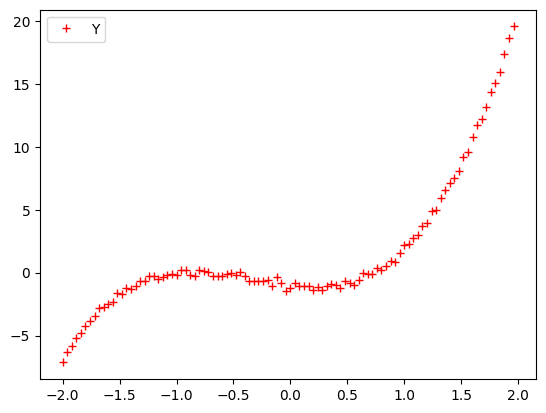

In [20]:
plt.plot(X.numpy(),Y.numpy(), "r+" , label='Y')
plt.legend()
plt.show()

## 2 Create a model  
It's  now time to create a model able to understand the tendency of our data

### 2.1 Create the neuronal network

In [ ]:
from torch import nn

#Here we create an ANN with 2layer one output and one inupt 

class NonLinearModel(nn.Module):
    #we use the variable n to set up the number of neurons 
    def __init__(self, n):
        super(NonLinearModel, self).__init__()
        self.linear1 = nn.Linear(1, n)
        #ReLu is our non linear activation function
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(n, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x

Let's create an instance of our model

In [22]:
model=NonLinearModel(50)

### 2.2 Optimzer and loss function

Time to define an optimizer and a loss function to improve our model biais and weight

In [23]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.0001)
lossfn= nn.MSELoss()

### 2.3 Model training loop 

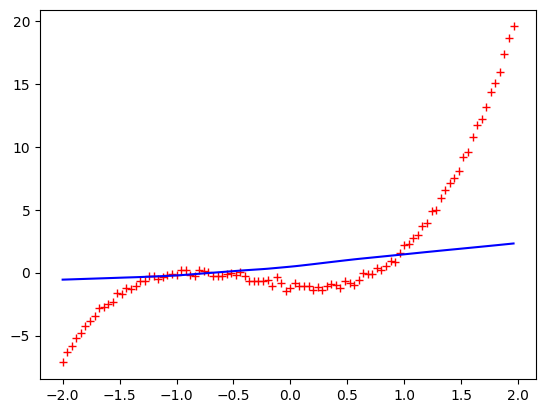

Epoch 0: Training loss: 304.7299499511719
Epoch 10: Training loss: 107.64996337890625
Epoch 20: Training loss: 86.74823760986328
Epoch 30: Training loss: 76.8039321899414
Epoch 40: Training loss: 69.26309204101562
Epoch 50: Training loss: 62.863914489746094
Epoch 60: Training loss: 57.2285270690918
Epoch 70: Training loss: 52.15951919555664
Epoch 80: Training loss: 47.58513641357422
Epoch 90: Training loss: 43.49069595336914
Epoch 100: Training loss: 39.799400329589844
Epoch 110: Training loss: 36.49086380004883
Epoch 120: Training loss: 33.555049896240234
Epoch 130: Training loss: 30.93052101135254
Epoch 140: Training loss: 28.596622467041016
Epoch 150: Training loss: 26.491592407226562
Epoch 160: Training loss: 24.612546920776367
Epoch 170: Training loss: 22.929519653320312
Epoch 180: Training loss: 21.42869758605957
Epoch 190: Training loss: 20.059587478637695


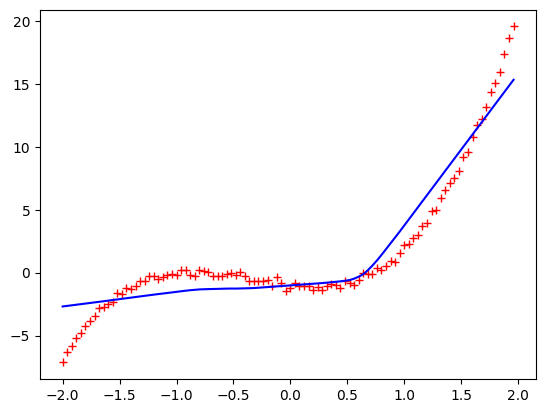

Epoch 200: Training loss: 18.82701873779297
Epoch 210: Training loss: 17.71291732788086
Epoch 220: Training loss: 16.683197021484375
Epoch 230: Training loss: 15.748319625854492
Epoch 240: Training loss: 14.896740913391113
Epoch 250: Training loss: 14.10175895690918
Epoch 260: Training loss: 13.362550735473633
Epoch 270: Training loss: 12.684150695800781
Epoch 280: Training loss: 12.055315017700195
Epoch 290: Training loss: 11.477126121520996
Epoch 300: Training loss: 10.935057640075684
Epoch 310: Training loss: 10.429311752319336
Epoch 320: Training loss: 9.95664119720459
Epoch 330: Training loss: 9.51586627960205
Epoch 340: Training loss: 9.106583595275879
Epoch 350: Training loss: 8.726648330688477
Epoch 360: Training loss: 8.367350578308105
Epoch 370: Training loss: 8.035284042358398
Epoch 380: Training loss: 7.721586227416992
Epoch 390: Training loss: 7.426074028015137


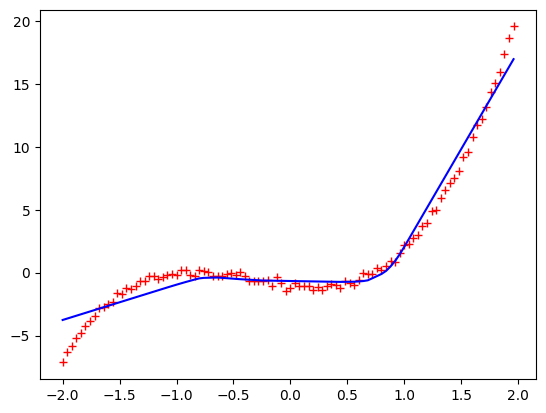

Epoch 400: Training loss: 7.1516313552856445
Epoch 410: Training loss: 6.895853042602539
Epoch 420: Training loss: 6.663448333740234
Epoch 430: Training loss: 6.440689563751221
Epoch 440: Training loss: 6.230188846588135
Epoch 450: Training loss: 6.031501770019531
Epoch 460: Training loss: 5.842469215393066
Epoch 470: Training loss: 5.66304349899292
Epoch 480: Training loss: 5.494335174560547
Epoch 490: Training loss: 5.341677188873291
Epoch 500: Training loss: 5.195681095123291
Epoch 510: Training loss: 5.0568623542785645
Epoch 520: Training loss: 4.918891429901123
Epoch 530: Training loss: 4.787818431854248
Epoch 540: Training loss: 4.659627437591553
Epoch 550: Training loss: 4.5440168380737305
Epoch 560: Training loss: 4.4316816329956055
Epoch 570: Training loss: 4.328518390655518
Epoch 580: Training loss: 4.228029251098633
Epoch 590: Training loss: 4.129456520080566


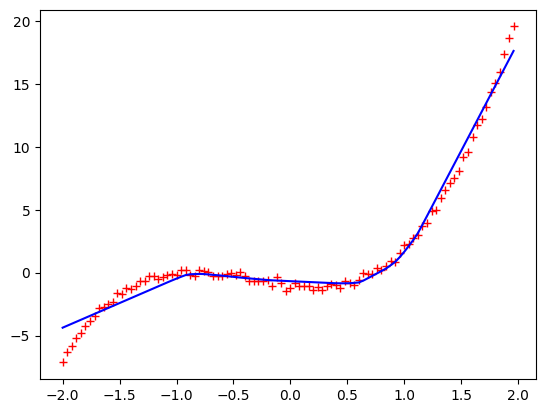

Epoch 600: Training loss: 4.034704685211182
Epoch 610: Training loss: 3.9420676231384277
Epoch 620: Training loss: 3.8519887924194336
Epoch 630: Training loss: 3.7663776874542236
Epoch 640: Training loss: 3.6838884353637695
Epoch 650: Training loss: 3.608186721801758
Epoch 660: Training loss: 3.5344254970550537
Epoch 670: Training loss: 3.46107816696167
Epoch 680: Training loss: 3.391021490097046
Epoch 690: Training loss: 3.3217296600341797
Epoch 700: Training loss: 3.2536964416503906
Epoch 710: Training loss: 3.1881041526794434
Epoch 720: Training loss: 3.1246492862701416
Epoch 730: Training loss: 3.062252998352051
Epoch 740: Training loss: 2.9989728927612305
Epoch 750: Training loss: 2.9404208660125732
Epoch 760: Training loss: 2.882394313812256
Epoch 770: Training loss: 2.8268632888793945
Epoch 780: Training loss: 2.7735238075256348
Epoch 790: Training loss: 2.7221715450286865


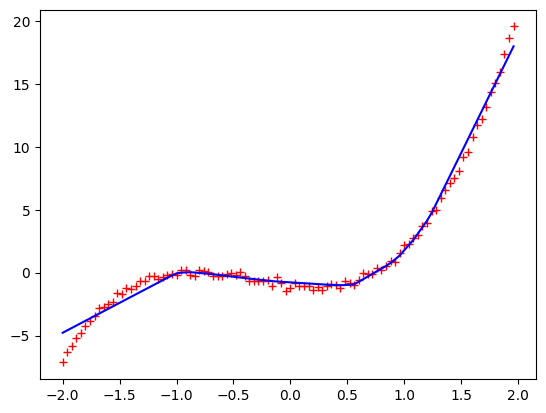

Epoch 800: Training loss: 2.6722965240478516
Epoch 810: Training loss: 2.624279022216797
Epoch 820: Training loss: 2.577174663543701
Epoch 830: Training loss: 2.531158447265625
Epoch 840: Training loss: 2.4874393939971924
Epoch 850: Training loss: 2.446791410446167
Epoch 860: Training loss: 2.4046385288238525
Epoch 870: Training loss: 2.363754987716675
Epoch 880: Training loss: 2.3243789672851562
Epoch 890: Training loss: 2.2844748497009277
Epoch 900: Training loss: 2.2464537620544434
Epoch 910: Training loss: 2.209137201309204
Epoch 920: Training loss: 2.1752378940582275
Epoch 930: Training loss: 2.1389665603637695
Epoch 940: Training loss: 2.1015121936798096
Epoch 950: Training loss: 2.067464828491211
Epoch 960: Training loss: 2.0347671508789062
Epoch 970: Training loss: 2.0023138523101807
Epoch 980: Training loss: 1.971487283706665
Epoch 990: Training loss: 1.9412823915481567


In [24]:
epoch = 1000 
LOSS= []

def train(epochs):
    for epoch in range(epochs) :
        preds=model(X)
        loss=lossfn(preds,Y)
        LOSS.append(loss.item())

        for x,y in zip(X,Y):
            predsf=model(x)
            lossf=lossfn(predsf, y)
            optimizer.zero_grad()
            lossf.backward()
            optimizer.step()

        preds = model(X)
        if epoch%200==0:
            plt.close('all')
            plt.figure(epoch)
            plt.plot(X.numpy(), Y.numpy(),'r+', label='Y')
            plt.plot(X.numpy(), preds.detach().numpy(), 'b-')
            plt.show()
        if epoch%10==0:
             print(f'Epoch {epoch}: Training loss: {lossf}')
        
train(epoch)



## 3 Visualize our model progression :

using plot we will visualize how fast our model learn and progress

Text(47.097222222222214, 0.5, 'LOSS')

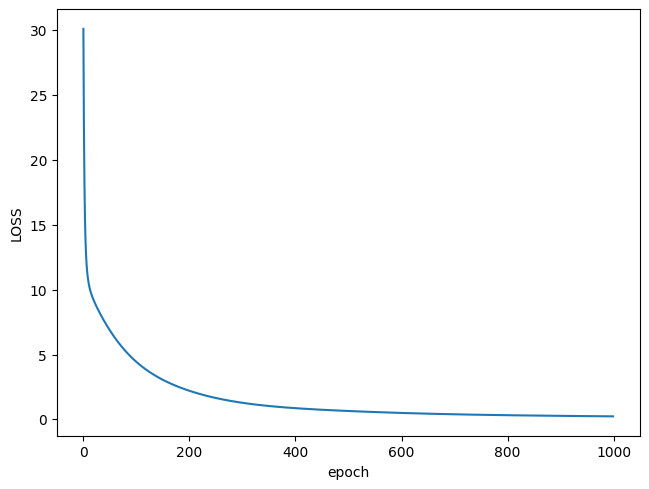

In [25]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("epoch")
plt.ylabel("LOSS")

This model is able to understand a really simple third or fouth degree non lienar system. 
For a more complex model we would need more neurons to permit a total understanding of coeficients and to follow the curve efficiently

# 4 Model tunning :

In [36]:
import torch.optim as optim

# Initialisation of Grid Search
epoch_choices = [500, 1000, 2000, 5000]  
optimizers = {
    'SGD': lambda params: optim.SGD(params, lr=0.001),
    'Adam': lambda params: optim.Adam(params, lr=0.001),
    'RMSprop': lambda params: optim.RMSprop(params, lr=0.001)
}
loss_functions = {
    'MSELoss': nn.MSELoss(),
    'L1Loss': nn.L1Loss(),
    'SmoothL1Loss': nn.SmoothL1Loss()
}

# training loop modified to fit grid search
def train_grid_search(epochs, optim_name, loss_name):
    global model, optimizer, lossfn
    LOSS = []
    MEDIANS = []

    # Configuration of optim and loss_fcnt
    optimizer = optimizers[optim_name](model.parameters())
    lossfn = loss_functions[loss_name]

    # training loop
    for epoch in range(epochs):
        preds = model(X)
        loss = lossfn(preds, Y)
        LOSS.append(loss.item())

        for x, y in zip(X, Y):
            predsf = model(x)
            lossf = lossfn(predsf, y)
            optimizer.zero_grad()
            lossf.backward()
            optimizer.step()

        # here we take the median of the last 25 values
    if len(LOSS) >= 25:
        last_25_errors = LOSS[-25:]  
        median_last_25 = torch.median(torch.tensor(last_25_errors)).item()
        MEDIANS.append(median_last_25)  
        print(median_last_25)

    return MEDIANS


results = {}
for epochs in epoch_choices:
    for optim_name in optimizers.keys():
        for loss_name in loss_functions.keys():
            print(f"Training with Optimizer: {optim_name}, Loss Function: {loss_name}, Epochs: {epochs}")
            MEDIANS = train_grid_search(epochs, optim_name, loss_name)
            results[(optim_name, loss_name, epochs)] = MEDIANS
            


Training with Optimizer: SGD, Loss Function: MSELoss, Epochs: 500
0.02659810520708561
Training with Optimizer: SGD, Loss Function: L1Loss, Epochs: 500
0.1353873461484909
Training with Optimizer: SGD, Loss Function: SmoothL1Loss, Epochs: 500
0.013319725170731544
Training with Optimizer: Adam, Loss Function: MSELoss, Epochs: 500
0.027012044563889503
Training with Optimizer: Adam, Loss Function: L1Loss, Epochs: 500
0.15116025507450104
Training with Optimizer: Adam, Loss Function: SmoothL1Loss, Epochs: 500
0.013447579927742481
Training with Optimizer: RMSprop, Loss Function: MSELoss, Epochs: 500
0.026920609176158905
Training with Optimizer: RMSprop, Loss Function: L1Loss, Epochs: 500
0.13261960446834564
Training with Optimizer: RMSprop, Loss Function: SmoothL1Loss, Epochs: 500
0.013448617421090603
Training with Optimizer: SGD, Loss Function: MSELoss, Epochs: 1000
0.026656754314899445
Training with Optimizer: SGD, Loss Function: L1Loss, Epochs: 1000
0.13346204161643982
Training with Optimiz

## Interpretation : 

Using Grid Search, we are now able to find the best combination of hyperparameters to optimize this model.

In [37]:

# Trouver la clé avec la plus petite médiane
min_key = min(results, key=results.get)

# Extraire l'optimiseur, le nom de la perte et le nombre d'epochs
optim_name, loss_name, epochs = min_key
min_median = results[min_key]

# Afficher les résultats
print(f"Optimiseur : {optim_name}")
print(f"Nom de la perte : {loss_name}")
print(f"Nombre d'epochs : {epochs}")
print(f"Médiane minimale : {min_median}")


Optimiseur : Adam
Nom de la perte : mse
Nombre d'epochs : 1000
Médiane minimale : 0.130358


in our case grid search is kinda useless because the problem is easy